# Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

# Convert Categorical data to Numerical

In [3]:
# One-Hot Encoding برای ستون diagnosis
df_encoded = pd.get_dummies(df, columns=['diagnosis'], prefix='diagnosis')
df_encoded['diagnosis_M'] = df_encoded['diagnosis_M'].astype(int)
df_encoded['diagnosis_B'] = df_encoded['diagnosis_B'].astype(int)
df_encoded


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  perimeter_worst  area_worst  \
0                   0.07871  ...           184.60      2019.0   
1                   0.05667  ...           158.80      1956.0   
2                   0.05999  ...           152.50      1709.0   
3                   0.09744  ...            98.87       567.7   
4                   0.05883  ...           152.20      1575.0   
..                      ...  ...              ...         ...   
564                 0.05623  ...           166.10      2027.0   
565                 0.05533  ...           155.00      1731.0   
566                 0.05648  ...           126.70      1124.0   
567                 0.07016  ...           184.60      1821.0   
568                 0.05884  ...            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   

# Replacing outliers with the classed mean

In [4]:
# تعریف تابع برای جایگزینی پرت‌ها با میانگین کلاس‌بندی‌شده
def replace_outliers_with_class_mean(df, column, target_column='diagnosis_M'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # محاسبه میانگین برای هر کلاس
    mean_by_class = df.groupby(target_column)[column].mean()
    
    # جایگزینی پرت‌ها با میانگین کلاس مربوطه
    for class_label in df[target_column].unique():
        mask = (df[target_column] == class_label) & ((df[column] < lower_bound) | (df[column] > upper_bound))
        df.loc[mask, column] = mean_by_class[class_label]
    return df

# اعمال تابع روی تمام ستون‌های عددی (به جز هدف)
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    if column != 'diagnosis_M':
        df_encoded = replace_outliers_with_class_mean(df_encoded, column)

print("\nدیتاست بعد از جایگزینی پرت‌ها با میانگین کلاس‌بندی‌شده:")
print(df_encoded.head())


دیتاست بعد از جایگزینی پرت‌ها با میانگین کلاس‌بندی‌شده:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0         0.118400   
1        20.57         17.77          132.90     1326.0         0.084740   
2        19.69         21.25          130.00     1203.0         0.109600   
3        11.42         20.38           77.58      386.1         0.102898   
4        20.29         14.34          135.10     1297.0         0.100300   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.145188        0.160775              0.14710       0.241900   
1          0.078640        0.086900              0.07017       0.181200   
2          0.159900        0.197400              0.12790       0.206900   
3          0.145188        0.241400              0.10520       0.192909   
4          0.132800        0.198000              0.10430       0.180900   

   fractal_dimension_mean  ...  per

# Train and Test Data

In [5]:
X = df_encoded.drop(['diagnosis_M'], axis=1)
y = df_encoded['diagnosis_M']

# 4. تقسیم اولیه به Train و (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.702, random_state=100)  # حداقل 70% آموزش

# 5. تقسیم دوم به Validation و Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=100)  # 15% از کل برای تست، بقیه برای اعتبارسنجی

# چک دقیق درصدها
total_samples = len(X)
print(f"تعداد کل نمونه‌ها: {total_samples}")
print(f"تعداد نمونه‌های آموزش: {len(X_train)} ({len(X_train)/total_samples*100:.2f}%)")
print(f"تعداد نمونه‌های تست: {len(X_test)} ({len(X_test)/total_samples*100:.2f}%)")
print(f"تعداد نمونه‌های اعتبارسنجی: {len(X_val)} ({len(X_val)/total_samples*100:.2f}%)")

تعداد کل نمونه‌ها: 569
تعداد نمونه‌های آموزش: 399 (70.12%)
تعداد نمونه‌های تست: 85 (14.94%)
تعداد نمونه‌های اعتبارسنجی: 85 (14.94%)


# Normalize

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Choose 20 important features

In [10]:
selector = SelectKBest(score_func=f_classif, k=20)
X_train_scaled_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_scaled_selected = selector.transform(X_val_scaled)
X_test_scaled_selected = selector.transform(X_test_scaled)

# گرفتن نام ویژگی‌های انتخاب‌شده
all_feature_names = X.columns.tolist()
selected_mask = selector.get_support()
feature_names = [all_feature_names[i] for i in range(len(selected_mask)) if selected_mask[i]]
print("\nویژگی‌های انتخاب‌شده:", feature_names)


ویژگی‌های انتخاب‌شده: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


# Fitting SVM

In [155]:
model = SVC(kernel='rbf', C=1, gamma=0.04, class_weight='balanced',  probability=True, random_state=100)  # SVM     
model.fit(X_train_scaled_selected, y_train)

SVC(C=1, class_weight='balanced', gamma=0.04, probability=True,
    random_state=100)

#  Cross-Validation 

# Accuracy on validation data

In [156]:
#  ارزیابی روی دیتای اعتبارسنجی
y_val_pred = model.predict(X_val_scaled_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"دقت روی دیتای اعتبارسنجی: {val_accuracy:.3f}")

دقت روی دیتای اعتبارسنجی: 0.965


# Accuracy Evaluation on train data

In [157]:
#  ارزیابی روی دیتای آموزشی
y_train_pred = model.predict(X_train_scaled_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"دقت روی دیتای آموزشی: {train_accuracy:.3f}")

دقت روی دیتای آموزشی: 0.980


# Evaluation on test data

In [158]:
#  ارزیابی روی دیتای تست
y_test_pred = model.predict(X_test_scaled_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"دقت روی دیتای تست: {test_accuracy:.3f}")
print("\nگزارش طبقه‌بندی برای دیتای تست:")
print(classification_report(y_test, y_test_pred, target_names=['خوش‌خیم', 'بدخیم']))

دقت روی دیتای تست: 0.965

گزارش طبقه‌بندی برای دیتای تست:
              precision    recall  f1-score   support

     خوش‌خیم       0.96      0.98      0.97        49
       بدخیم       0.97      0.94      0.96        36

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



# confusion_matrix

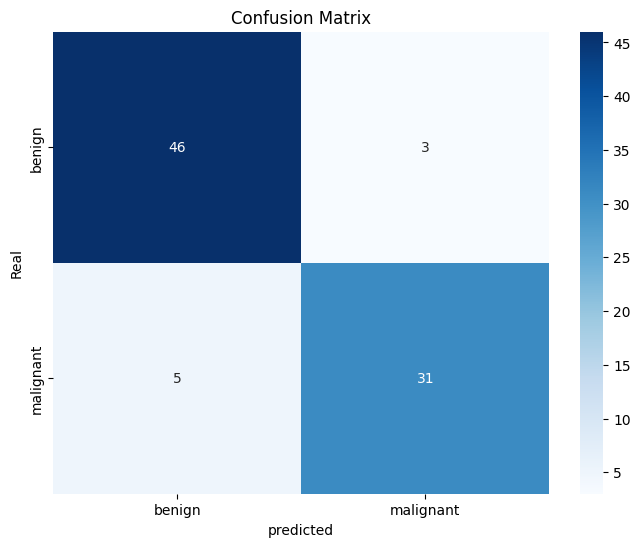

In [159]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[ 'benign','malignant'], yticklabels=[ 'benign','malignant'])
plt.xlabel('predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()